# 네트워크 크기 축소
------------------------------------
> #### 과대적합을 막는 가장 단순한 방법으로 모델의 학습 파라미터 수를 줄이는 것이다.
> #### 파라미터가 많은 모델이 기억 용량이 더 많지만, 이런 것은 일반화 능력이 없다.
> #### 하지만 또한 과소적합이 되지 않도록 충분한 파라미터를 가진 모델이어야 하기에 중간 정도의 절충점을 계속된 평가를 통해 알아봐야 한다.

### 영화 리뷰 모델에 적용해보기

In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant t

In [3]:
word_index = imdb.get_word_index() # word_index는 단어와 정수 인텍스를 매핑한 딕셔너리
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # 정수 인덱스와 단어를 매핑하도록 뒤집는다.
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    # 크기가 (len(sequences), dimension)인 모든 원소가 0인 행렬을 만든다.
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1. # result[i]에서 특정 인덱스의 위치를 1로 만든다.
    return results


x_train = vectorize_sequences(train_data) # 훈련데이터를 벡터로 변환한다.
x_test = vectorize_sequences(test_data) # 테스트 데이터를 벡터로 변환한다.

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 원래 네트워크

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000, )))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer='rmsprop',
             loss='binarp_crossentropy',
             metrics=['accuracy'])

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc']) # 정확도를 지정할 떼 accuracy 또는 acc 모두 사용 가능하다.

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 138ms/step - loss: 0.5272 - acc: 0.7781 - val_loss: 0.4198 - val_acc: 0.8314
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3118 - acc: 0.8989 - val_loss: 0.3051 - val_acc: 0.8875
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2239 - acc: 0.9267 - val_loss: 0.2971 - val_acc: 0.8806
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1750 - acc: 0.9421 - val_loss: 0.2908 - val_acc: 0.8826
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1431 - acc: 0.9513 - val_loss: 0.2881 - val_acc: 0.8858
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1206 - acc: 0.9629 - val_loss: 0.3112 - val_acc: 0.8815
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0972 - acc: 0.9706 - val_loss: 0.3271 - val_acc: 0.8805
Epoch 8/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0839 - 

In [11]:
history_dict = history.history

In [12]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

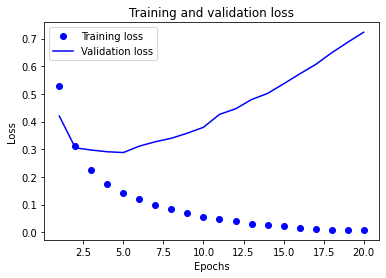

In [13]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') # 'bo'는 파란색 점을 의미한다.
plt.plot(epochs, val_loss, 'b', label='Validation loss') # 'b'는 파란색 실선을 의미한다.
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 더 작은 네트워크

Epoch 1/20
30/30 [==============================] - 14s 464ms/step - loss: 0.5432 - acc: 0.7863 - val_loss: 0.4392 - val_acc: 0.8628
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3676 - acc: 0.8919 - val_loss: 0.3556 - val_acc: 0.8794
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2837 - acc: 0.9140 - val_loss: 0.3081 - val_acc: 0.8876
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2316 - acc: 0.9299 - val_loss: 0.2862 - val_acc: 0.8911
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1958 - acc: 0.9393 - val_loss: 0.2776 - val_acc: 0.8906
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1684 - acc: 0.9482 - val_loss: 0.2753 - val_acc: 0.8896
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1467 - acc: 0.9568 - val_loss: 0.2889 - val_acc: 0.8833
Epoch 8/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1290 -

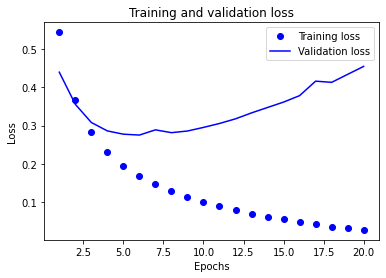

In [14]:
model = models.Sequential()
model.add(layers.Dense(6, activation="relu", input_shape=(10000, )))
model.add(layers.Dense(6, activation="relu"))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc']) # 정확도를 지정할 떼 accuracy 또는 acc 모두 사용 가능하다.

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') # 'bo'는 파란색 점을 의미한다.
plt.plot(epochs, val_loss, 'b', label='Validation loss') # 'b'는 파란색 실선을 의미한다.
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 과대적합되는 부분이 작은 네트워크가 더 나중에 된다!!
### 이번에는 훨씬 더 큰 용량을 가진 네트워크..

Epoch 1/20
30/30 [==============================] - 13s 439ms/step - loss: 0.6659 - acc: 0.7466 - val_loss: 0.3302 - val_acc: 0.8747
Epoch 2/20
30/30 [==============================] - 8s 275ms/step - loss: 0.2542 - acc: 0.9039 - val_loss: 0.4945 - val_acc: 0.7850
Epoch 3/20
30/30 [==============================] - 8s 268ms/step - loss: 0.1796 - acc: 0.9417 - val_loss: 0.4396 - val_acc: 0.8432
Epoch 4/20
30/30 [==============================] - 8s 266ms/step - loss: 0.1453 - acc: 0.9689 - val_loss: 0.2881 - val_acc: 0.8899
Epoch 5/20
30/30 [==============================] - 8s 274ms/step - loss: 0.0078 - acc: 0.9988 - val_loss: 0.4276 - val_acc: 0.8884
Epoch 6/20
30/30 [==============================] - 8s 283ms/step - loss: 4.8125e-04 - acc: 1.0000 - val_loss: 0.5352 - val_acc: 0.8880
Epoch 7/20
30/30 [==============================] - 8s 274ms/step - loss: 5.7357e-05 - acc: 1.0000 - val_loss: 0.6255 - val_acc: 0.8878
Epoch 8/20
30/30 [==============================] - 8s 277ms/step -

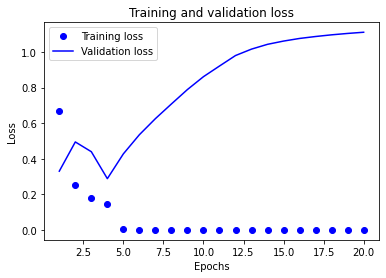

In [15]:
model = models.Sequential()
model.add(layers.Dense(1024, activation="relu", input_shape=(10000, )))
model.add(layers.Dense(1024, activation="relu"))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc']) # 정확도를 지정할 떼 accuracy 또는 acc 모두 사용 가능하다.

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') # 'bo'는 파란색 점을 의미한다.
plt.plot(epochs, val_loss, 'b', label='Validation loss') # 'b'는 파란색 실선을 의미한다.
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 검증 손실도 매우 불안정하고 과대적합이 바로 일어나는 것을 볼 수 있다ㅋㅋㅋㅋ

# 가중치 규제 추가
> **오컴의 면도날** 어떤 것에 대한 두 가지의 설명이 있다면 더 적은 가정이 필요한 간단한 설명이 옳을 것이라는 이론. => **간단한 모델이 복잡한 모델보다 과대적합될 가능성이 적다!!**
> #### 여기서 간단한 모델이란 적은 수의 파라미터를 가졌거나 파라미터 값 분포의 엔트로피가 작은 모델이다.
> #### 그러므로 네트워크 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 강제하는 것이 바로 가중치 규제이다.
> 이를 위해선 네트워크의 손실 함수에 큰 가중치에 연관된 비용을 추가한다.
* ### L1규제
> 가중치의 절댓값에 비례하는 비용이 추가된다(가중치의 L1노름(norm)).
* ### L2규제
> 가중치의 제곱에 비례하는 비용이 추가된다. 신경망에서 가중치 감쇠라고도 부른다.
> #### 가중치의 파라미터를 모두 제곱하여 더한 후 이 값의 제곱근을 구하는 것이 L2노름.
------------------------
### 모델에 L2 가중치 추가하기

In [19]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

> l2(0.001)는 가중치 행렬의 모든 원소를 제곱하고 0.001을 곱하여 네트워크의 전체 손실에 더해진다는 의미이다. 이 규제는 훈련할 때만 추가된다.
### 케라스에서 사용할 수 있는 가중치 규제

In [20]:
from keras import regularizers

regularizers.l1(0.001) # L1규제

regularizers.l1_l2(l1=0.001, l2=0.001) # L1과 L2규제 병행

# 이 함수의 매개변수 기본값은 모두 0.01이다.

# 드롭아웃 추가
> **드롭아웃(dropout)**은 토론토 대학의 학생들이 개발했다고 한다. 신경망을 위해 사용되는 방법중 가장 효과적이고 널리 사용되는 방법이라고 한다.
> #### 네트워크 층에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 출력 특성을 제외(0으로)만든다.

### EX)

In [ ]:
layer_output *= np.random.randint(0, high=2, size=layer_output) # 훈련단계
layer_output /= 0.4

## 아니 근데 이게 왜 과대적합을 줄이는데 도움이 됨?

> 홀리찟~ 힌튼은 은행에서 사용하는 부정 방지 메커니즘에서 착안했다고 하는데, 은행에서 부정행위를 하려면 직원들 사이의 유대가 필요하기 때문에 은행원을 자주 바꾼다고 한다. 그걸 신경망에 적용해서 뉴런의 일부를 무작위로 제거해 과대적합을 감소시키는 것이다.

In [21]:
model.add(layers.Dropout(0.5)) # 이게 바로 드롭아웃!!!

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000, )))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# 과대적합 방지 방법!!
* 1. 훈련데이터 더 모으기.
* 2. 네트워크의 용량 감소시키기.
* 3. 가중치 규제를 추가한다.
* 4. 드롭아웃을 추가한다.